In [1]:
import seaborn as sns

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [11]:
df['deck'].value_counts(dropna=False)

deck
NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: count, dtype: int64

In [39]:
df.isnull()
df.notnull()
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [25]:
!pip install missingno

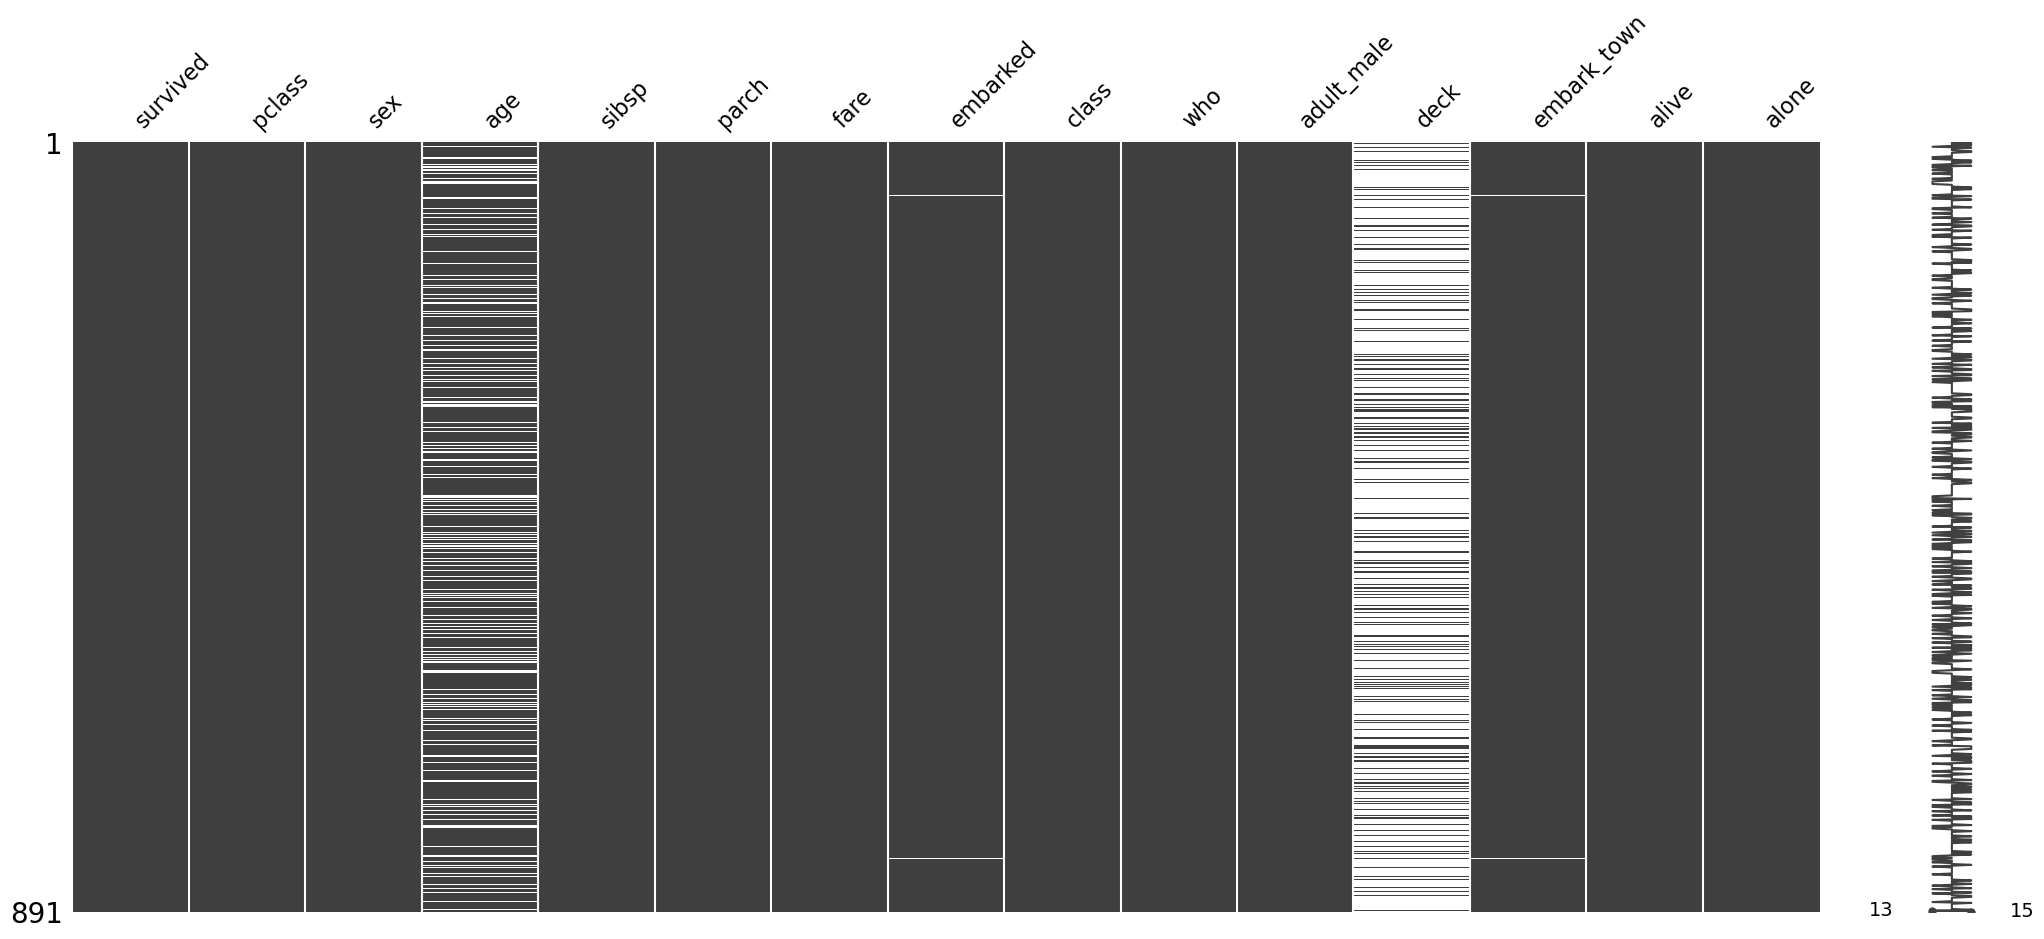

In [29]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df)
plt.show()

<Axes: >

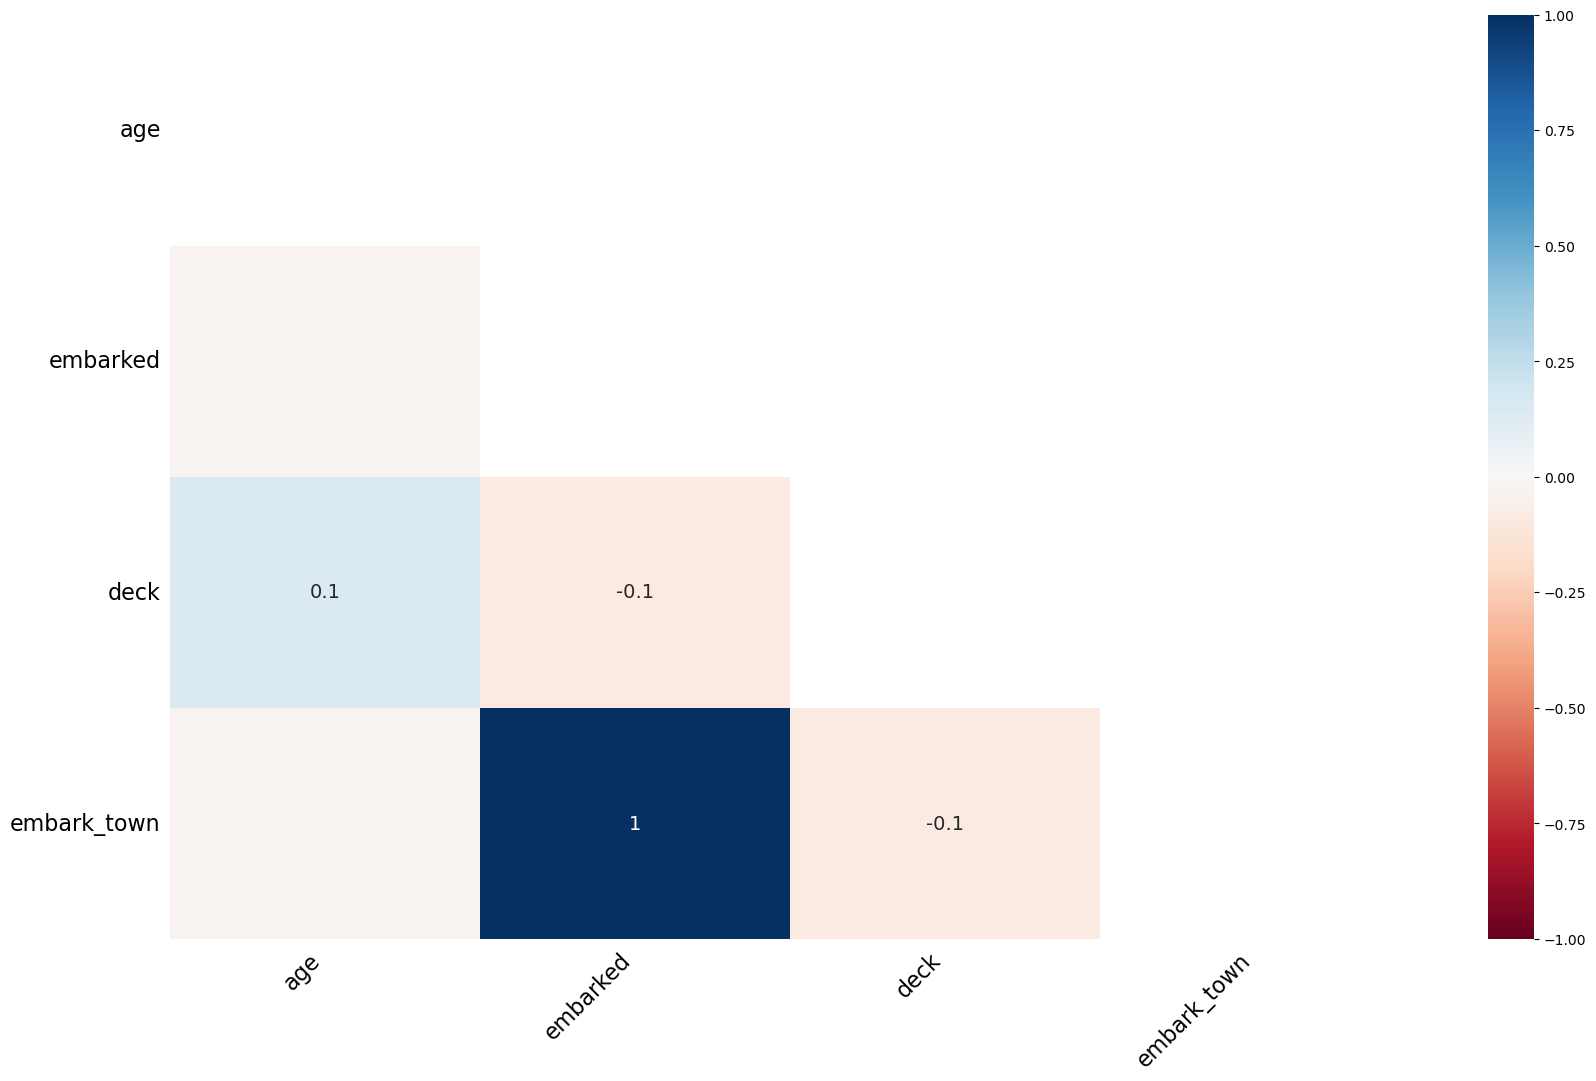

In [31]:
msno.heatmap(df)

In [37]:
# 누락 데이터 표현
import pandas as pd

ser1 = pd.Series([1, 2, None])
ser1

ser2 = pd.Series([1, 2, None], dtype="Int64")
ser2

0       1
1       2
2    <NA>
dtype: Int64

In [67]:
import seaborn as sns

df = sns.load_dataset('titanic')
df.info()
df.columns

# 누락 데이터 제거
# 'deck'열 삭제
# df_new = df.drop(columns=['deck'])
# df_new.columns  # deck 없음

# NaN 값이 500개 이상인 열을 모두 삭제
df_thresh = df.dropna(axis=1, thresh=500)
df_thresh.columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [65]:
# 누락 데이터 대체
# 1. 평균 이용 - mean()
mean_age = df['age'].mean()
print(mean_age)
df['age'] = df['age'].fillna(mean_age);
df['age'].head(10)

29.69911764705882


0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: age, dtype: float64

In [77]:
# 2. 최빈값 이용 - mode()
df['embark_town'][825:830]

most_freq = df['embark_town'].mode()[0] #Southampton
df['embark_town'] = df['embark_town'].fillna(most_freq)
df['embark_town'][825:830]

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829    Southampton
Name: embark_town, dtype: object

In [79]:
# 중복 데이터 처리
import pandas as pd

df = pd.DataFrame({
    "c1": ['a', 'a', 'b', 'a', 'b'],
    "c2": [1, 1, 1, 2, 2],
    "c3": [1, 1, 2, 2, 2]
})
df

,c1,c2,c3
0,a,1,1
1,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


In [87]:
# 전체 열에서 중복값 확인
# df.duplicated()
df.duplicated(keep="first")

# df.duplicated(keep="last")

# 특정 열 데이터에서 중복값 확인
df['c2'].duplicated()

0    False
1     True
2     True
3    False
4     True
Name: c2, dtype: bool

In [91]:
# 중복 데이터 제거
df2 = df.drop_duplicates()
df2

,c1,c2,c3
0,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


In [93]:
# 중복된 행 모두 제거
df3 = df.drop_duplicates(keep=False)
df3

,c1,c2,c3
2,b,1,2
3,a,2,2
4,b,2,2
